In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [6]:
USeast = MultiModelLargeEnsemble(models=['CanESM5','cesm_lens',
                                         'MIROC6','MPI-ESM1-2-LR','EC-Earth3'],
                                 variable='tas', granularity='day', lat=41.3, 
                                 lon=-72.5,bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 return_period=10, hist_slice=slice('1995','2014'),
                                 coarsen=7, conseq_days=1, rolling_average = 10,
                                 load=True)

### sensitivity testing
using model:internal ratio for testing the various parameters. When ratio > 1, model uncertainty dominates. When ratio < 1, internal variability dominates. 

### Return periods 

In [21]:
return_periods = [5,10,15,20,25,30, 50, 75, 100, 200]
test_return = []
for i in return_periods:
    internal = USeast.extreme_internal_variability(
        return_period=i,
        coarsen=1,
        conseq_days=1,
        rolling_average=10,
        hist_slice=slice('1995','2014')
    )
    test_return.append(internal)

Text(0.5, 1.0, 'Varying Return Period')

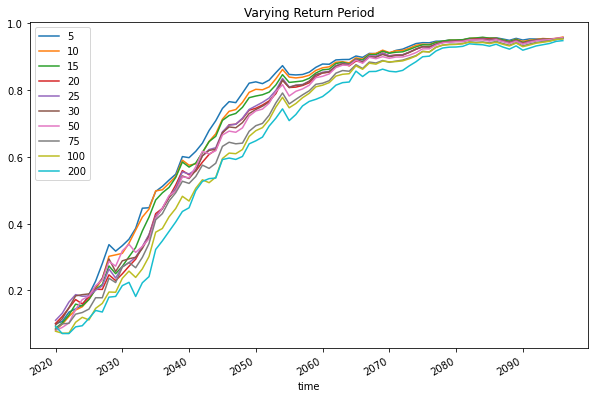

In [22]:
figure = plt.figure(figsize=(10,6))
for r,i in zip(test_return,return_periods):
    (r.model_le/r.total_le).plot(label=i)
plt.legend()
plt.title('Varying Return Period')

### Hist_slice

In [26]:
hist_slice_periods = [slice('1920','1940'),slice('1940','1960'),slice('1960','1980'),
                      slice('1990','2010'),slice('1995','2014'),slice('1930','1950'),
                      slice(None, None), slice('1990', None)]
test_histslice = []
for i in hist_slice_periods:
    internal = USeast.extreme_internal_variability(
        return_period=10,
        coarsen=1,
        conseq_days=1,
        rolling_average=10,
        hist_slice=i
    )
    test_histslice.append(internal)

Text(0.5, 1.0, 'Varying Hist Slice Period')

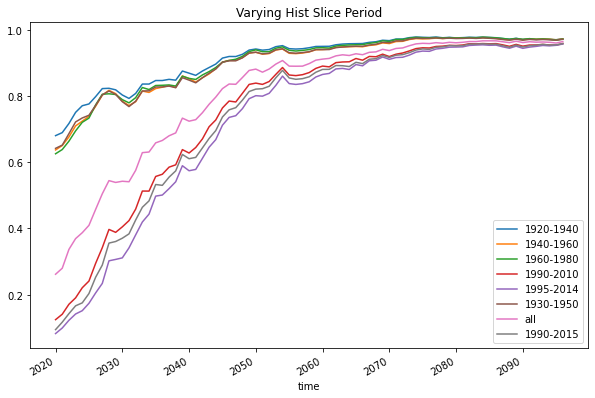

In [27]:
figure = plt.figure(figsize=(10,6))
hist_slice_periods = ['1920-1940','1940-1960','1960-1980',
                      '1990-2010','1995-2014','1930-1950',
                      'all', '1990-2015']
for r,i in zip(test_histslice,hist_slice_periods):
    (r.model_le/r.total_le).plot(label=i)
plt.legend()
plt.title('Varying Hist Slice Period')

### coarsen

In [42]:
coarsen = [1,2,3,4,5,6,7]
test_coarsen = []
for i in coarsen:
    internal = USeast.extreme_internal_variability(
        return_period=10,
        coarsen=i,
        conseq_days=1,
        rolling_average=10,
        hist_slice=slice('1995','2014')
    )
    test_coarsen.append(internal)

0.9997262149212868
0.9994523548740416
0.9991786447638604
0.9989047097480832
0.998631074606434
0.9983566146261298
0.9980824544582934


Text(0.5, 1.0, 'Varying Coarsen (days)')

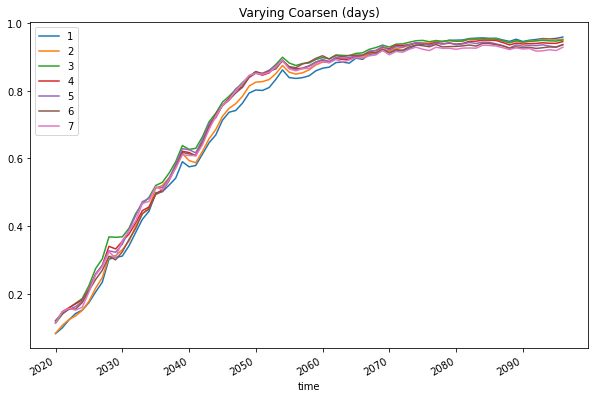

In [43]:
figure = plt.figure(figsize=(10,6))
for r,i in zip(test_coarsen,coarsen):
    (r.model_le/r.total_le).plot(label=i)
plt.legend()
plt.title('Varying Coarsen (days)')

### Consecutive days 

In [45]:
conseq = [1,2,3,4,5,6]
test_conseq = []
for i in conseq:
    internal = USeast.extreme_internal_variability(
        return_period=10,
        coarsen=7,
        conseq_days=i,
        rolling_average=10,
        hist_slice=slice('1995','2014')
    )
    test_conseq.append(internal)

0.9980824544582934
0.9980824544582934
0.9980824544582934
0.9980824544582934
0.9980824544582934
0.9980824544582934


Text(0.5, 1.0, 'Varying Consecutive Days')

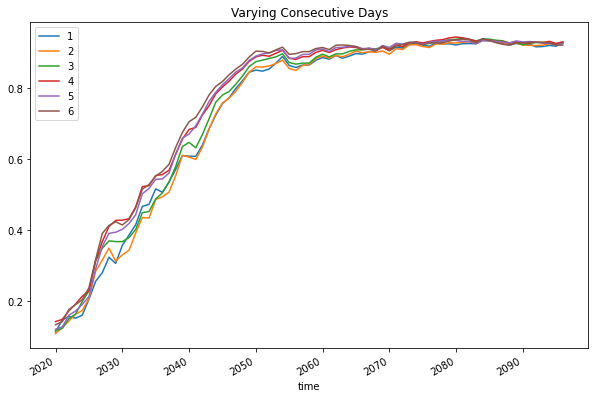

In [46]:
figure = plt.figure(figsize=(10,6))
conseq = [1,2,3,4,5,6]
for r,i in zip(test_conseq,conseq):
    (r.model_le/r.total_le).plot(label=i)
plt.legend()
plt.title('Varying Consecutive Days')

### rolling average

In [24]:
rolling_average = [1,5,10,15,20,25]
test_rolling = []
for i in rolling_average:
    internal = USeast.extreme_internal_variability(
        return_period=10,
        coarsen=1,
        conseq_days=1,
        rolling_average=10,
        hist_slice=slice('1995','2014')
    )
    test_rolling.append(internal)

Text(0.5, 1.0, 'Varying Rolling Average')

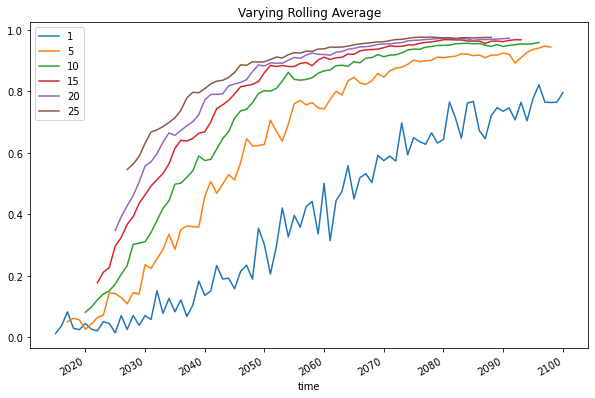

In [49]:
figure = plt.figure(figsize=(10,6))
rolling_average = [1,5,10,15,20,25]
for r,i in zip(test_rolling,rolling_average):
    (r.model_le/r.total_le).plot(label=i)
plt.legend()
plt.title('Varying Rolling Average')